## Building different text analysis functions

This notebook contains a variety of text analysis functions. They have been built and tested here. They are reusable and for implementation in the web-app, I will move them to a different Python Script file where they will be implemented as modules.

**Importing necessary libraries**

In [23]:
# Standard Libraries
import os 
import re 
import string 
import numpy as np
from collections import Counter

# Text Processing Library 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from textblob import TextBlob
from wordcloud import WordCloud

# Sentence structure 
import spacy
from spacy import displacy
from pathlib import Path
from spacy.matcher import PhraseMatcher, Matcher
from spacy.tokens import Span

# Data Visualisation 
import matplotlib.pyplot as plt 
from pprint import pprint
import seaborn as sns
from PIL import Image
from IPython.display import Image

In [3]:
# NLTK Downloads
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Load the Dataset

I have collected the corpus of the first Harry Potter novel by J.K Rowling - The Sorceror's Stone. I will now clean this data and perform analysis on it.

In [4]:
filepath = '../data/Harry_Potter.txt'

# Read the data
with open(filepath, 'r') as f:
    text = f.read()

In [5]:
# Collect stopwords. These are the most commonly occuring words in the English Language and might not be very effective for our analysis
STOPWORDS = stopwords.words('english')

In [6]:
# Have a look at the STOPWORDS
print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Utility Functions

These will the most common functions that I will be using in my code and hence, I have given them a separate section. 

In [7]:
# Cleaning Function 

def clean_text(text):
    '''
        Function which returns a clean text 
    '''
    
    # Lower case 
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d', '', text)
    
    # Replace \n and \t functions 
    text = re.sub(r'\n', '', text)
    text = text.strip()
    
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove Stopwords and Lemmatise the data
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in STOPWORDS]
    text = ' '.join(text)
    
    return text

## Text Analysis

In [8]:
# Step 1: Clean the data
print("Number of words before cleaning:", len(text.split()))
text = clean_text(text)
print("Number of words after cleaning:", len(text.split()))

Number of words before cleaning: 78399
Number of words after cleaning: 42404


So, a lot of words have been removed but they are much better for our analysis.

### Word Cloud Generation

World Clouds are a collection, or cluster, of words depicted in different sizes. It is a very useful visual representation technique to find out the important words in a text. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [9]:
# Create a word cloud function 
def create_wordcloud(text, image_path = None):
    '''
    Pass a string to the function and output a word cloud
    
    text: The text for wordcloud
    image_path (optional): The image mask with a white background (default None)
    
    '''
    if image_path == None:
        # Generate the word cloud
        wordcloud = WordCloud(width = 600, height = 600, 
                    background_color ='white', 
                    stopwords = STOPWORDS, 
                    min_font_size = 10).generate(text) 
    
    else:
        mask = np.array(Image.open(image_path))
        wordcloud = WordCloud(width = 600, height = 600, 
                    background_color ='white', 
                    stopwords = STOPWORDS,
                    mask=mask,
                    min_font_size = 5).generate(text) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation = 'nearest') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

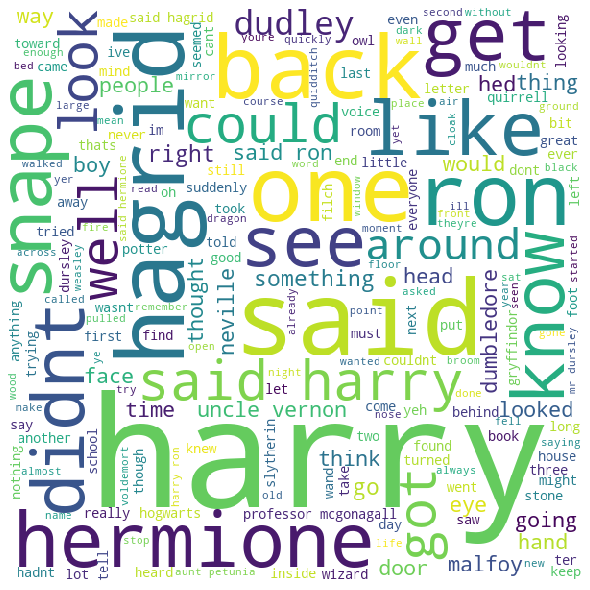

In [10]:
# Plotting a word cloud without passing an image
create_wordcloud(text)

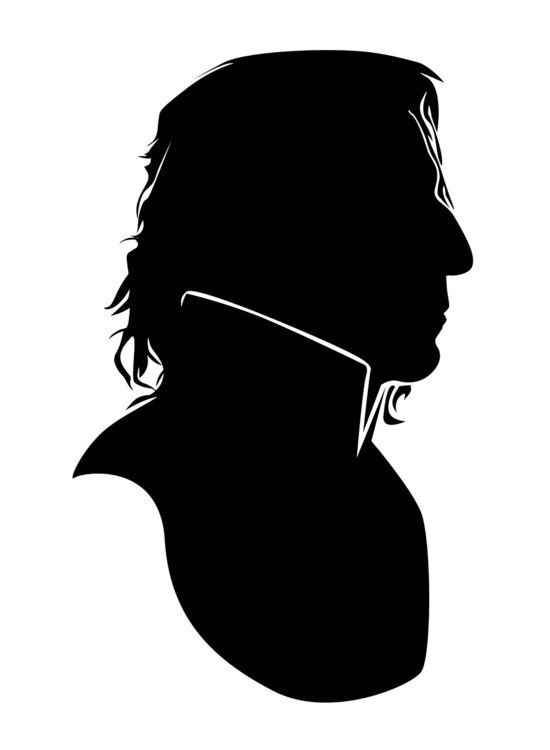

In [13]:
# Show the mask 
Image(filename='../images/snape_mask.jpg') 

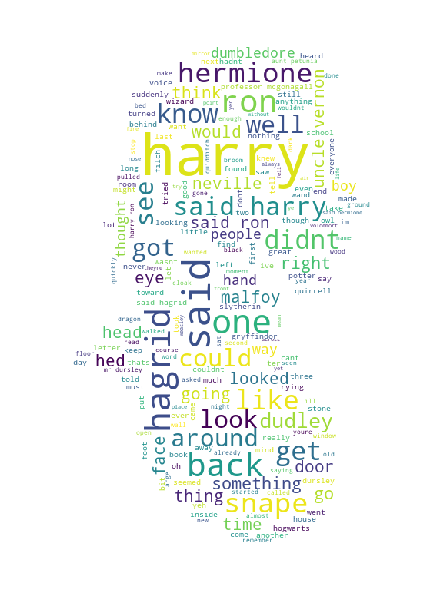

In [12]:
# Plotting a word cloud with a Snape mask image
create_wordcloud(text, image_path='../images/snape_mask.jpg')

### n-Gram Analysis

n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. 
In this analysis, I am trying to identify the most commonly occuring ngrams. 

In [18]:
def plot_ngrams(text, n=2, topk=15):
    '''
    Function to plot the most commonly occuring n-grams in bar plots 
    
    '''
    tokens = text.split()
    
    # get the ngrams 
    ngram_phrases = ngrams(tokens, n)
    
    # Get the most common ones 
    most_common = Counter(ngram_phrases).most_common(topk)
    
    # Make word and count lists 
    words, counts = [], []
    for phrase, count in most_common:
        word = ' '.join(phrase)
        words.append(word)
        counts.append(count)
    
    # Plot the barplot 
    plt.figure(figsize=(10, 6))
    title = "Most Common " + str(n) + "-grams in the text"
    plt.title(title)
    ax = plt.bar(words, counts)
    plt.xlabel("Most Common n-grams Found in the Text")
    plt.ylabel("Ngram frequencies")
    plt.xticks(rotation=90)
    plt.show()

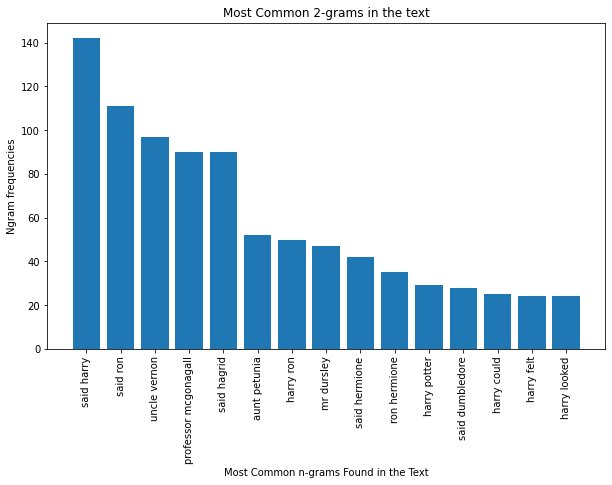

In [24]:
plot_ngrams(text, n=2, topk=15)

## Sentence Structure

This aspect of the analysis will deal with sentence structures and how they are made up and broken down.

### POS Tagging
POS tagging is the process of marking up a word in a corpus to a corresponding part of a speech tag, based on its context and definition. A POS tag (or part-of-speech tag) is a special label assigned to each token (word) in a text corpus to indicate the part of speech and often also other grammatical categories such as tense, number (plural/singular), case etc. POS tags are used in corpus searches and in text analysis tools and algorithms.

In [18]:
def pos_tagger(s):
    
    # Define the tag dictionary 
    output = ''
    
    # Remove punctuations
    s = s.translate(str.maketrans('', '', string.punctuation))
    
    tagged_sentence = nltk.pos_tag(nltk.word_tokenize(s))
    for tag in tagged_sentence:
        out = tag[0] + ' ---> ' + tag[1] + '\n'
        output += out

    return output

In [19]:
print(pos_tagger(sentence))

It ---> PRP
took ---> VBD
him ---> PRP
a ---> DT
while ---> NN
to ---> TO
realize ---> VB
that ---> IN
everything ---> NN
he ---> PRP
decided ---> VBD
not ---> RB
to ---> TO
change ---> VB
he ---> PRP
was ---> VBD
actually ---> RB
choosing ---> VBG
Now ---> RB
I ---> PRP
need ---> VBP
to ---> TO
ponder ---> VB
my ---> PRP$
existence ---> NN
and ---> CC
ask ---> VB
myself ---> PRP
if ---> IN
Im ---> NNP
truly ---> RB
real ---> JJ



### Named Entity Recognition

Using Spacy for Named Entity Recognition. 

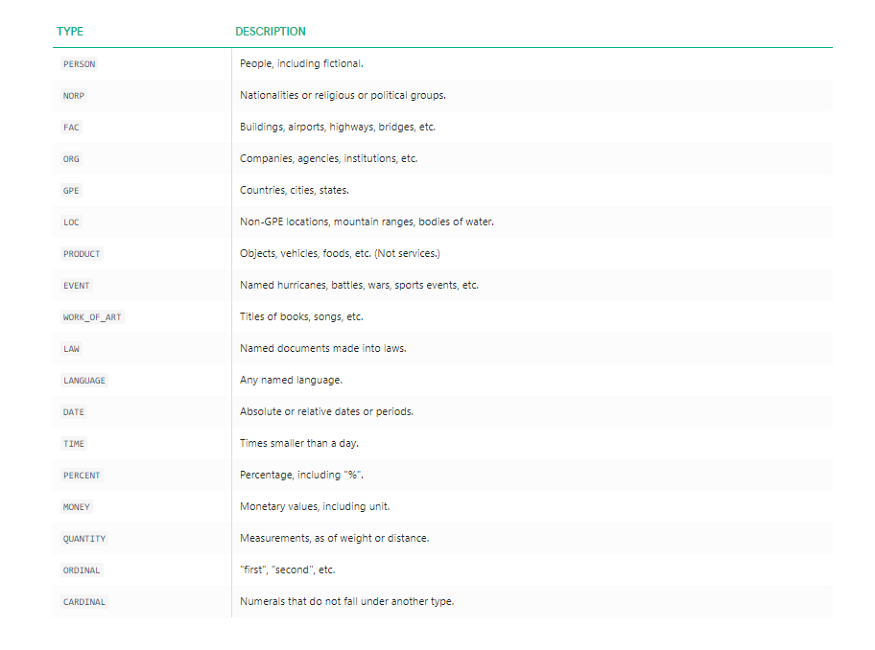

In [21]:
# Import necesary libraries 

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

ner = en_core_web_sm.load()

In [26]:
# Apply spacy on our sentence 
sentence = "A Few Good Men is a 1992 American legal drama film set in Boston directed by Rob Reiner and starring Tom Cruise, Jack Nicholson, and Demi Moore. The film revolves around the court-martial of two U.S. Marines charged with the murder of a fellow Marine and the tribulations of their lawyers as they prepare a case to defend their clients."
doc = ner(sentence)

# Show Results
pprint([(X.text, X.label_) for X in doc.ents])


[('1992', 'DATE'),
 ('American', 'NORP'),
 ('Boston', 'GPE'),
 ('Rob Reiner', 'PERSON'),
 ('Tom Cruise', 'PERSON'),
 ('Jack Nicholson', 'PERSON'),
 ('Demi Moore', 'PERSON'),
 ('two', 'CARDINAL'),
 ('U.S. Marines', 'NORP'),
 ('Marine', 'NORP')]


In [28]:
displacy.render(nlp(str(sentence)), jupyter=True, style='ent')